# Predicting Loan Approval using Logistic Regression



---

<p align="justify">The following analysis focuses on developing a predictive model for loan approval outcomes. By examining a dataset containing diverse applicant characteristics such as income, credit history, and property details, we aim to build a logistic regression model capable of forecasting whether a loan will be approved. The methodology employed includes comprehensive data preparation steps and model training to achieve this objective.

---



In [1]:
!pip install pyjanitor

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/loan_data.csv')
df

,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan ID             981 non-null    object 
 1   Gender              957 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    object 
 4   Education           981 non-null    object 
 5   Self Employed       926 non-null    object 
 6   Applicant Income    981 non-null    int64  
 7   Coapplicant Income  981 non-null    float64
 8   Loan Amount         954 non-null    float64
 9   Loan Amount Term    961 non-null    float64
 10  Credit History      902 non-null    float64
 11  Property Area       981 non-null    object 
 12  Loan Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [5]:
# Clean and standardise column names
df = df.clean_names()
df

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


## Data Cleaning

In [6]:
# Remove loan_id column as it's not needed for analysis
df = df.drop('loan_id', axis=1, errors='ignore')

In [7]:
# Remove rows with missing values
df = df.dropna(subset=['gender', 'married', 'loan_status'])

In [8]:
# Replace '3+' with '3' for consistency and convert to numeric format
df['dependents'] = df['dependents'].replace('3+', '3')
df['dependents'] = df['dependents'].astype(float)

In [9]:
# Fill missing values in numerical columns with their means
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())
df['credit_history'] = df['credit_history'].fillna(df['credit_history'].mean())
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())
df['coapplicant_income'] = df['coapplicant_income'].fillna(df['coapplicant_income'].mean())

In [10]:
# Fill missing values in categorical columns with most frequent value (mode)
df['dependents'] = df['dependents'].fillna(df['dependents'].mode()[0])
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['property_area'] = df['property_area'].fillna(df['property_area'].mode()[0])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              598 non-null    object 
 1   married             598 non-null    object 
 2   dependents          598 non-null    float64
 3   education           598 non-null    object 
 4   self_employed       598 non-null    object 
 5   applicant_income    598 non-null    int64  
 6   coapplicant_income  598 non-null    float64
 7   loan_amount         598 non-null    float64
 8   loan_amount_term    598 non-null    float64
 9   credit_history      598 non-null    float64
 10  property_area       598 non-null    object 
 11  loan_status         598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 60.7+ KB


## Label Encoding

In [12]:
le = LabelEncoder()

# Label Encoding for binary categories
binary_cols = ['gender', 'married', 'education', 'self_employed', 'loan_status']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for Property Area
df = pd.get_dummies(df, columns=['property_area'], drop_first=True)

## Define Features and Target

In [13]:
# Define features (X) and target variable (y) for model training
X = df[['gender', 'married', 'dependents', 'education', 'self_employed',
        'applicant_income', 'coapplicant_income', 'loan_amount',
        'loan_amount_term', 'credit_history',
        'property_area_Semiurban', 'property_area_Urban']]
y = df['loan_status']

## Feature Engineering

In [14]:
# Combine incomes
df['total_income'] = df['applicant_income'] + df['coapplicant_income']

# Log-transform skewed income and loan amount
df['log_total_income'] = np.log1p(df['total_income'])
df['log_loan_amount'] = np.log1p(df['loan_amount'])

# Update X
X = df[['gender', 'married', 'dependents', 'education', 'self_employed',
        'log_total_income', 'log_loan_amount',
        'loan_amount_term', 'credit_history',
        'property_area_Semiurban', 'property_area_Urban']]

## Train-Test Split

In [15]:
# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Scaling

In [16]:
# Standardise numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression Application

In [17]:
# Initialise and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Make Predictions

In [18]:
# Generate predictions and probability scores on the test set
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

## Model Evaluation

In [19]:
# Calculate and display key performance metrics for model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.79
Precision: 0.78
Recall: 0.98
F1 Score: 0.87
ROC AUC: 0.77


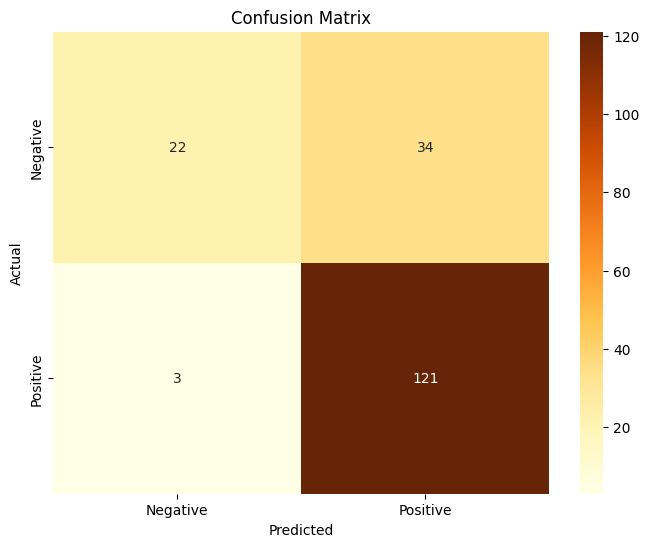

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

<p align="justify">The logistic regression model developed in this analysis demonstrates reasonable performance in predicting loan approval status. Key evaluation metrics, including accuracy, precision, recall, and F1 score, indicate the model's ability to correctly classify loan applications. The ROC AUC score suggests that the model can effectively distinguish between approved and rejected loans.

<p align="justify">The confusion matrix provides further insight into the model's performance, showing the counts of true positives, true negatives, false positives, and false negatives. While the model exhibits a good overall accuracy, there may be opportunities to improve its performance further, potentially by exploring additional features, trying different machine learning algorithms, or optimizing the model's hyperparameters.

<p align="justify">In conclusion, the logistic regression model provides a valuable tool for predicting loan approval based on the given dataset. The insights gained from this analysis can be utilized to streamline the loan application process and inform decision-making.